### Imports

In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

### Lets import the data, select one random momo review, and see what it is
Each row of the data represents the average review of the momo served by a particular restaurant at a particular location

In [51]:
momo_ratings_df = pd.read_csv("data/momo_ratings.csv")
sample = momo_ratings_df.sample()
sample

,Unnamed: 0,location,momo_rating
1241,1241,Darjeeling,2.76


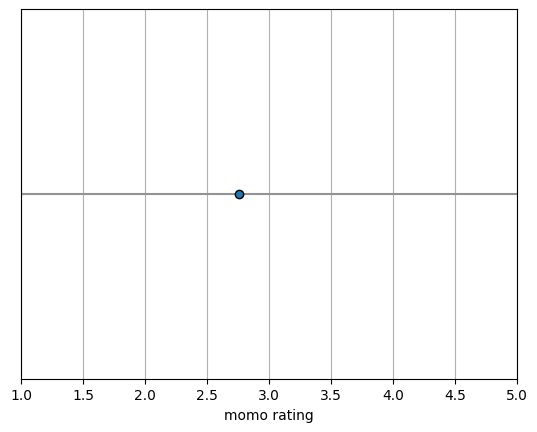

In [52]:
plt.scatter(sample["momo_rating"], [0], edgecolors="black", zorder=3)
plt.yticks([])
plt.axhline(0, color="#939393")
plt.xlim([1, 5])
plt.grid(zorder=0)
plt.xlabel("momo rating")
plt.show()

Now let's do this for all the restaurants, ordered on the basis of location

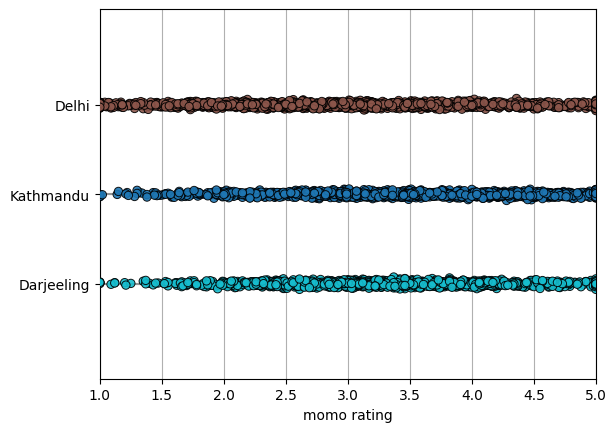

In [71]:
color_normals = []
plot_y = []
for index, row in momo_ratings_df.iterrows():
    # encoding the 3 locations on 3 horizontal lines
    if row["location"] == "Kathmandu":
        color_normals.append(0)
        # applying a small random jitter to each data point so each stands out a little more
        plot_y.append(0 + 0.02 * np.random.randn())
    elif row["location"] == "Delhi":
        color_normals.append(0.5)
        plot_y.append(1 + 0.02 * np.random.randn())
    else:
        color_normals.append(0.9)
        plot_y.append(-1 + 0.02 * np.random.randn())

cmap = plt.cm.tab10

plt.scatter(
    momo_ratings_df["momo_rating"],
    plot_y,
    c=cmap(color_normals),
    edgecolors="black",
    linewidth=0.7,
    alpha=0.9,
    zorder=3,
)
plt.yticks(ticks=[-1, 0, 1], labels=["Darjeeling", "Kathmandu", "Delhi"])
for i in range(-1, 2, 1):
    plt.axhline(i, color="#939393")
plt.xlim([1, 5])
plt.ylim([min(plot_y) - 1, max(plot_y) + 1])
plt.grid(zorder=0)
plt.xlabel("momo rating")
plt.show()

There is absolutely no way we can infer anything from this visualization alone.

Let's look at some aggregate data

In [41]:
print(
    "Mean ratings:\n", momo_ratings_df.groupby(by="location").momo_rating.mean(), "\n"
)
print("Rating variances:\n", momo_ratings_df.groupby(by="location").momo_rating.std())

Mean ratings:
 location
Darjeeling    3.330466
Delhi         2.947048
Kathmandu     3.449804
Name: momo_rating, dtype: float64 

Rating variances:
 location
Darjeeling    0.535562
Delhi         0.770746
Kathmandu     0.591603
Name: momo_rating, dtype: float64


So Kathmandu momos are the best rated, but Darjeeling momos have a lower variance. There is already an uncertainty on which of these places has the best momo

It is of no surprise that Delhi has the worst rated momo. 
Which is entirely expected, as Delhiites call momo momos and eat them with mayo.
Disclaimer: causal relationship between and bad ratings has not been established (yet ;).

Back to Kathmandu and Darjeeling momo - is the difference between them is significant enough to crown one of them as the better?

We can do this using Statistical significance

Let's look at the confidence intervals for the data

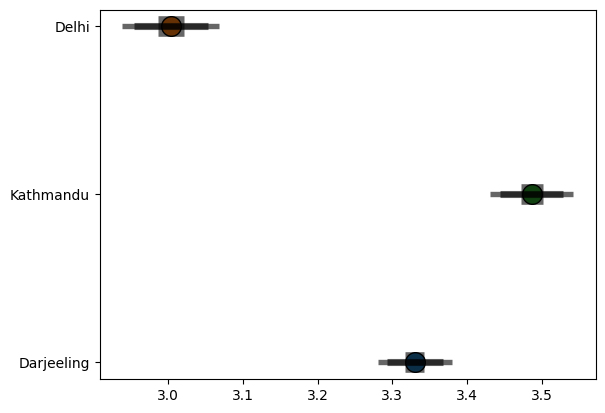

In [108]:
momos_separated = {
    location: momo_ratings_df[momo_ratings_df["location"] == location]
    for location in momo_ratings_df["location"].unique()
}

for key, val in momos_separated.items():
    root = np.std(val["momo_rating"]) / np.sqrt(len(val))
    cis = [
        0.674 * root,
        1.96 * root,
        2.58 * root,
    ]  # 50%, 95% and 99% confidence intervals
    mean = val["momo_rating"].mean()
    if key == "Kathmandu":
        yloc = 0
    elif key == "Delhi":
        yloc = 1
    else:
        yloc = -1
    plt.scatter(mean, [yloc], s=20, edgecolors="black")
    for ci in cis:
        plt.fill_betweenx(
            [yloc], mean - ci, mean + ci, color="k", alpha=0.6, linewidth=root / ci * 10
        )
    plt.yticks(ticks=[-1, 0, 1], labels=["Darjeeling", "Kathmandu", "Delhi"])

In [ ]:
color_normals = []
plot_y = []
for index, row in momo_ratings_df.iterrows():
    # encoding the 3 locations on 3 horizontal lines
    if row["location"] == "Kathmandu":
        color_normals.append(0)
        # applying a small random jitter to each data point so each stands out a little more
        plot_y.append(0 + 0.02 * np.random.randn())
    elif row["location"] == "Delhi":
        color_normals.append(0.5)
        plot_y.append(1 + 0.02 * np.random.randn())
    else:
        color_normals.append(0.9)
        plot_y.append(-1 + 0.02 * np.random.randn())

cmap = plt.cm.tab10

plt.scatter(
    momo_ratings_df["momo_rating"],
    plot_y,
    c=cmap(color_normals),
    edgecolors="black",
    linewidth=0.7,
    alpha=0.9,
    zorder=3,
)
plt.yticks(ticks=[-1, 0, 1], labels=["Darjeeling", "Kathmandu", "Delhi"])
for i in range(-1, 2, 1):
    plt.axhline(i, color="#939393")
plt.xlim([1, 5])
plt.ylim([min(plot_y) - 1, max(plot_y) + 1])
plt.grid(zorder=0)
plt.xlabel("momo rating")
plt.show()